<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/YouTube_Insights_Uma_An%C3%A1lise_dos_Canais_Mais_Bem_Sucedidos_da_Plataforma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>
<img src="https://cdn-images-1.medium.com/max/800/1*0oAVUuAAK6kiDILND2EReA.png" width="%"></p>

# **Introdução**

Em um mundo onde o vídeo se tornou uma das formas de mídia mais consumidas, o YouTube se destaca como uma plataforma líder. Este artigo utiliza uma abordagem de Data Science para desvendar as complexidades e dinâmicas por trás do sucesso no YouTube, fornecendo um olhar aprofundado sobre os canais que moldam o entretenimento global.

# **Entendimento da Análise**

O objetivo desta análise é explorar a paisagem diversificada dos canais do YouTube, identificando quais são os mais populares, suas categorias e o impacto de diferentes países na plataforma. Isso inclui entender as métricas de sucesso, como número de inscritos e visualizações de vídeo, e como esses fatores se correlacionam com os ganhos dos criadores.

# **Entendimento dos Dados**

Nossos dados consistem em 995 canais do YouTube, detalhando atributos como 'rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Country', entre outros. Observamos que a T-Series da Índia ocupa a primeira posição com 245 milhões de inscritos e aproximadamente 228 bilhões de visualizações. Outros canais notáveis incluem o YouTube Movies dos EUA com 170 milhões de inscritos e MrBeast também dos EUA com 166 milhões de inscritos e 28.37 bilhões de visualizações.



Realizei uma inspeção inicial. Utilizando o método head() do Pandas, observamos as primeiras linhas do nosso conjunto de dados. Essa visão nos deu uma primeira impressão das variáveis com as quais estaríamos trabalhando, embora nesta fase, nosso objetivo principal fosse verificar se os dados foram carregados corretamente.

In [1]:
!pip install gdown

In [2]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import warnings
import gdown
warnings.filterwarnings('ignore')
sns.set_style()
%matplotlib inline
# Google Drive file ID
file_id = '1VrgQrVmTzfUH71ablWTAdxWGSaw_v7pt'

# Define the URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

# Define the file name to save it locally
output_file = 'Global_Youtube_Statistics.csv'

# Download the file from Google Drive
gdown.download(url, output_file, quiet=False)

# Read the downloaded CSV file into a DataFrame
df = pd.read_csv(output_file, encoding='latin')

# Display the first rows of the dataset
df.head()

Downloading...
From: https://drive.google.com/uc?id=1VrgQrVmTzfUH71ablWTAdxWGSaw_v7pt
To: /content/Global_Youtube_Statistics.csv
100%|██████████| 200k/200k [00:00<00:00, 82.3MB/s]


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Temos dois canais da India dentro do top 10. Sendo o 1 lugar para o T-Series. Um canal de séries de música da India. E em 5 lugar o SET India, que é um canal de ententretenimento, onde passa programas como Idol.


* Temos o segundo, terceiro, quarto, sétimo e décimo lugares representado pelo Estados Unidos. Sendo 3 canais de conteúdo infantil, que são eles: 4 lugar - Cocomelon - Nursery Rhymes.  7 lugar - Kids Diana Show. 10 lugar - Vlad and Niki.              E o segundo YouTube Movies, que são opções de filmes, aluguéis, lançamentos de filmes pelo youtube. O terceiro MR.Beast que é um canal de Entretenimento.

* Em nono lugar temos da Rússia, outro canal de conteúdo infantil chamado Like Nastya

* E em 8 lugar temos do Japão, um canal chamado PewDiePie, que é um canala de Entretenimento.

#### **Top 5 canais da lista( Visualização inicial )**
  * **T-Series:** 245 milhões de inscritos, 228 bilhões de visualizações de vídeo, categoria Música, da Índia.
  * **YouTube Movies:** 170 milhões de inscritos, 0 visualizações de vídeo (Devido a ser um local onde permite o aluguel e compra de filmes).
  * **MrBeast:** 166 milhões de inscritos, aproximadamente 28.37 bilhões de visualizações de vídeo, categoria Entretenimento, dos Estados Unidos.
  *  **Cocomelon - Nursery Rhymes:** 162 milhões de inscritos, 164 bilhões de visualizações de vídeo, categoria Educação, dos Estados Unidos.
  * **SET India:** 159 milhões de inscritos, 148 bilhões de visualizações de vídeo, categoria Shows, da Índia.

Esses dados fornecem uma visão rica sobre os canais do YouTube mais populares, suas categorias, e os países de origem. Os insights aqui podem variar desde a dominância de certas categorias de conteúdo, como música e entretenimento, até a importância dos mercados de mídia indiano e americano.

Analisando o tamanho, seja de linhas e colunas que temos no dataset e entendendo o tipo de dados que temos, até para verificar se será necessário algum tratamento.

In [4]:
# DataFrame rows and columns
df.shape

(995, 28)

In [5]:
# DataFrame columns
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# **Preparação dos Dados**

Os dados foram cuidadosamente limpos e preparados para análise. Isso incluiu a correção de nomes de canais, tratamento de valores ausentes, remoção de duplicatas e correção de dados incorretos como o ano de criação dos canais. A integridade dos dados foi verificada antes de prosseguir com uma análise exploratória detalhada.

#### Limpeza de Dados

Para garantir a integridade de nossa análise, vamos verificar e lidar com quaisquer inconsistências ou valores ausentes nos dados. Essas etapas incluem:

   * Corrigir Nomes de Canais: É possível notar nomes de canais com caracteres estranhos, optei por corrigir os que serão visualizados, analisados neste projeto. Nesse primeiro momento visualizei o canal 'ýýý Kids Diana Show', porem o nome correto seria 'Kids Diana Show'. Verifiquei outro nome com entrada errada chamado 'Vocï¿½ï¿½ï¿½', porem pesquisando, arrumei para o nome correto 'Voce Sabia'. O canal da Beyonce também estava com entrada errada, e foi corrigida. Neste projeto optei por corrigir nomes relevantes de fato para análise deste projeto.
   * Houve correção para a data de criação do YouTube que estava listada incorretamente como 1970, sendo alterada para 2005.
   * Tratar Valores Ausentes: Identificar e tratar quaisquer valores nulos nos dados, decidindo se devemos imputar, excluir ou manter esses valores.
   * Remover Duplicatas: Verificar se existem linhas duplicadas no conjunto de dados e removê-las para evitar distorções na análise.

In [7]:
# Correcting the name 'ýýý Kids Diana Show' to 'Kids Diana Show'.
df.loc[df['Youtuber'] == 'ýýý Kids Diana Show', 'Youtuber'] = 'Kids Diana Show'
df.loc[df['Title'] == 'ýýý Kids Diana Show', 'Title'] = 'Kids Diana Show'

In [8]:
df.loc[df['Youtuber'] == 'Vocï¿½ï¿½ï¿½', 'Youtuber'] = 'Voce Sabia'
df.loc[df['Title'] == 'Vocï¿½ï¿½ï¿½', 'Title'] = 'Voce Sabia'

In [9]:
df.loc[df['Youtuber'] == 'Beyoncï¿', 'Youtuber'] = 'Beyonce'
df.loc[df['Title'] == 'Beyoncï¿', 'Title'] = 'Beyonce'

In [10]:
# First date in this dataframe
df.created_year.min()

1970.0

In [11]:
# Last date in this dataframe
df.created_year.max()

2022.0

In [12]:
# Replacing the year 1970 with 2005, also modifying the month and day.
df.loc[df['created_year'] == 1970.0, 'created_year'] = 2005
df.loc[df['created_month'] == 'Jan', 'created_month'] = 'Feb'
df.loc[df['created_date'] == 1.0, 'created_date'] = 14.0

In [13]:
# Checking the correction
df.loc[df['Country'] == 'United States'].sort_values(by='created_year', ascending=True)[0:10]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
519,520,Apple,17300000,1.026425e+09,Science & Technology,Apple,180,United States,US,Tech,...,100000.0,2005.0,Jun,22.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
187,188,Michael Jackson,28200000,1.441247e+10,Music,Michael Jackson,15,United States,US,Music,...,200000.0,2005.0,Jun,22.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
682,683,PlayStation,15000000,4.741434e+09,Gaming,PlayStation,20292,United States,US,Games,...,100000.0,2005.0,Dec,16.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
368,369,NBA,20700000,1.262488e+10,Sports,NBA,47926,United States,US,Sports,...,NaN,2005.0,Nov,21.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
658,659,CNN,15200000,1.419815e+10,News & Politics,CNN,160405,United States,US,News,...,100000.0,2005.0,Oct,2.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
581,582,Jennifer Lopez,16200000,1.022724e+10,Music,Jennifer Lopez,258,United States,US,Music,...,NaN,2005.0,Nov,18.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
216,217,Smosh,26100000,1.043547e+10,Comedy,Smosh,1619,United States,US,Comedy,...,400000.0,2005.0,Nov,19.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
916,917,Akon,12900000,6.300933e+09,Music,Akon,39,United States,US,Music,...,100000.0,2005.0,Nov,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
427,428,shane,19200000,4.329121e+09,People & Blogs,shane,570,United States,US,Comedy,...,NaN,2005.0,Sep,22.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
539,540,VICE,16900000,4.609753e+09,Entertainment,VICE,3900,United States,US,Entertainment,...,100000.0,2005.0,Dec,16.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [14]:
# Looking at the first 10 entries to verify the correction of names.
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,14.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Kids Diana Show,112000000,9.324704e+10,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Feb,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


Verificando dados ausentes

In [15]:
df.isnull().sum().sort_values(ascending=False).round(2)

subscribers_for_last_30_days               337
Longitude                                  123
Latitude                                   123
Urban_population                           123
Unemployment rate                          123
Population                                 123
Gross tertiary education enrollment (%)    123
Country                                    122
Abbreviation                               122
country_rank                               116
video_views_for_the_last_30_days            56
category                                    46
channel_type_rank                           33
channel_type                                30
created_date                                 5
created_month                                5
created_year                                 5
video_views_rank                             1
rank                                         0
highest_yearly_earnings                      0
lowest_yearly_earnings                       0
highest_month

### Aqui está um resumo da integridade dos dados:

   * O conjunto de dados contém 995 entradas e 28 colunas.
   * Algumas colunas, como category, Country, Abbreviation, channel_type, video_views_for_the_last_30_days, subscribers_for_last_30_days, Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population, Latitude, e Longitude têm valores ausentes que precisarão ser tratados.
   * A maioria das colunas está no formato de dados esperado (por exemplo, int64 para contagens inteiras, float64 para números com ponto flutuante e object para strings/texto).

## Descobrindo Duplicatas

Remover Duplicatas envolve verificar se existem linhas duplicadas no conjunto de dados para evitar distorções na análise. Porem nesse projeto não há duplicatas

In [16]:
# Duplicate check using the duplicated() method to mark duplicate rows
duplicates = df.duplicated()

# Filter the df using the boolean series to examine the duplicates
duplicate_rows = df[duplicates]

# No duplicate rows exist in the df
print(duplicate_rows)

Empty DataFrame
Columns: [rank, Youtuber, subscribers, video views, category, Title, uploads, Country, Abbreviation, channel_type, video_views_rank, country_rank, channel_type_rank, video_views_for_the_last_30_days, lowest_monthly_earnings, highest_monthly_earnings, lowest_yearly_earnings, highest_yearly_earnings, subscribers_for_last_30_days, created_year, created_month, created_date, Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population, Latitude, Longitude]
Index: []

[0 rows x 28 columns]


In [17]:
df.duplicated().sum()

0

# Dados Ausentes  

Começaremos tratando os valores ausentes. Dado o número de valores ausentes em algumas colunas, a remoção completa das linhas pode resultar na perda de uma quantidade significativa de dados. Em vez disso, podemos optar por imputar os valores ausentes para colunas numéricas usando a mediana, que é robusta a outliers, e a moda para colunas categóricas.

In [18]:
# Imputation

from sklearn.impute import SimpleImputer

# Creating an imputer for numerical values using the median
imputer_num = SimpleImputer(strategy='median')

# Numerical columns to be imputed
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Applying the imputation for numerical columns
df[num_columns] = imputer_num.fit_transform(df[num_columns])

# Creating an imputer for categorical values using the mode (most frequent value)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Categorical columns to be imputed
cat_columns = df.select_dtypes(include=['object']).columns

# Applying the imputation for categorical columns
df[cat_columns] = imputer_cat.fit_transform(df[cat_columns])

# Checking if there are still missing values
df.isnull().sum().sum()


0

In [19]:
# Changing the data type to int.
df.created_year = pd.to_numeric(df.created_year).astype(int)
df.created_date = pd.to_numeric(df.created_date).astype(int)

# **Análise Exploratória de Dados (EDA)**
As análises incluem a descrição estatística dos dados, a contagem de canais por país e a filtragem dos canais brasileiros por número de inscritos.

In [20]:
# Descriptive Analysis
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,...,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00
mean,498.00,22982412.06,11039537052.04,9187.13,553692.79,346.99,723.16,169333484.85,36886.15,589807.85,...,7081813.92,298587.00,2012.67,16.22,64.17,417759957.73,9.29,229956800.43,27.93,-18.80
std,287.38,17526105.34,14110844376.83,34151.35,1362209.49,1163.10,1915.72,405295815.24,71858.72,1148622.48,...,13797037.61,504433.27,4.30,8.29,24.48,443853171.67,4.58,145606357.52,19.55,80.31
min,1.00,12300000.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,...,0.00,1.00,2005.00,2.00,7.60,202506.00,0.75,35588.00,-38.42,-172.10
25%,249.50,14500000.00,4288145410.00,194.50,324.00,14.00,28.00,22323000.00,2700.00,43500.00,...,521750.00,100000.00,2009.00,9.00,40.20,126014024.00,5.36,102626859.00,20.59,-95.71
50%,498.00,17700000.00,7760819588.00,729.00,915.50,51.00,65.50,64085000.00,13300.00,212700.00,...,2600000.00,200000.00,2013.00,16.00,68.00,328239523.00,9.37,270663028.00,37.09,-51.93
75%,746.50,24600000.00,13554701853.00,2667.50,3579.00,114.00,137.00,158565500.00,37900.00,606800.00,...,7300000.00,200000.00,2016.00,23.00,88.20,328239523.00,14.70,270663028.00,37.09,78.96
max,995.00,245000000.00,228000000000.00,301308.00,4057944.00,7741.00,7741.00,6589000000.00,850900.00,13600000.00,...,163400000.00,8000000.00,2022.00,31.00,113.10,1397715000.00,14.72,842933962.00,61.92,138.25


In [21]:
# Count of channel by countries
df.Country.value_counts()

United States           435
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
Andorra             

* Nessa lista, os Estados Unidos tem a maior entrada com 313 canais específicos. inida fica em segundo, com 168 canais do Youtube, seguidos pelo Brazil com 62 canais entre os que possuem mais inscritos.

In [22]:
# Looking at Which Channels Lead the List in Brazil (Top 10).
df.loc[df['Country'] == 'Brazil'].sort_values(by='subscribers', ascending=False)[0:10]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
23,24.00,Canal KondZilla,66500000.00,36775585925.00,Music,Canal KondZilla,2572.00,Brazil,BR,Music,...,200000.00,2012,Mar,21,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
54,55.00,Felipe Neto,45200000.00,16602198273.00,Entertainment,Felipe Neto,4331.00,Brazil,BR,Entertainment,...,200000.00,2006,May,16,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
55,56.00,Voce Sabia,44700000.00,7828610828.00,Entertainment,Voce Sabia,1558.00,Brazil,BR,Entertainment,...,100000.00,2013,Sep,14,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
59,60.00,whinderssonnunes,44200000.00,4274709210.00,Comedy,whinderssonnunes,558.00,Brazil,BR,Comedy,...,200000.00,2013,Feb,21,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
83,84.00,GR6 EXPLODE,38900000.00,25154232306.00,Music,GR6 EXPLODE,3043.00,Brazil,BR,Music,...,100000.00,2014,Aug,5,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
96,97.00,Maria Clara & JP,37000000.00,24188861917.00,People & Blogs,Maria Clara & JP,744.00,Brazil,BR,Entertainment,...,300000.00,2015,Sep,6,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
120,121.00,Galinha Pintadinha,33800000.00,27274550757.00,Film & Animation,Galinha Pintadinha,66.00,Brazil,BR,Film,...,200000.00,2006,Aug,30,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
138,139.00,rezendeevil,32100000.00,13061739758.00,Gaming,rezendeevil,11882.00,Brazil,BR,Entertainment,...,200000.00,2012,Feb,12,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
176,177.00,Enaldinho,29200000.00,11627437847.00,Comedy,Enaldinho,3654.00,Brazil,BR,Games,...,1000000.00,2012,Nov,7,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93
204,205.00,Renato Garcia YT,26900000.00,7938616641.00,Entertainment,Renato Garcia YT,3956.00,Brazil,BR,Entertainment,...,200000.00,2011,Sep,29,51.30,212559417.00,12.08,183241641.00,-14.24,-51.93


### **Quais são os top 10 canais brasileiros do YouTube com maiores inscritos no mundo?**

In [23]:
import plotly.express as px

# DataFrame
filtered_df = df.loc[df['Country'] == 'Brazil'].sort_values(by='subscribers', ascending=False)[0:10]

# Sort the DataFrame in ascending order for better visualization
filtered_df = filtered_df.sort_values(by='subscribers', ascending=True)

# Create a bar chart with dark red color
fig = px.bar(filtered_df, x='subscribers', y='Youtuber',  # Replace 'Name' with the appropriate column name
             title='Top 10 Brazilian Channels by Subscribers',
             labels={'subscribers': 'Subscribers', 'Youtuber': 'Channel Name'}, # Replace 'Name' with the appropriate column name
             color_discrete_sequence=['#e4c344'],
             text_auto='.3s')

# Customizar a cor do texto nos bares
fig.update_traces(textfont_color='white')
fig.update_traces(textfont_size=15)

# Customizing the layout
fig.update_layout(
    # Set the size of the plot
    width=1000,
    height=600,

    # Customize font and title
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),

    # Customizing the title
    title=dict(
        text='Top 10 Brazilian Channels by Subscribers.',
        x=0.5,  # Title center alignment
        xanchor='center',
        yanchor='top'
    ),

    # Customize x-axis and y-axis titles
    xaxis_title="Subscribers",
    yaxis_title="Channel Name", # Replace with your column name
)

# Show the plot
fig.show()

A lista demonstrou que o canal Kondzila é o maior entre os canais brasileiros, seguido por Felipe Neto, Você Sabia, Windersson Nunes, GR6 EXPLODE, que lideram o top 5. Temos então entre as categorias de canais, Música em primeiro lugar, seguido por Entretenimento, Comédia e Música novamente. Entretenimento lidera a frequência nessa lista de top 10 canais brasileiros.

In [24]:
# Understanding the Biggest Channels in India.
df.loc[df['Country'] == 'India'].sort_values(by='subscribers', ascending=False)[0:10]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1.00,T-Series,245000000.00,228000000000.00,Music,T-Series,20082.00,India,IN,Music,...,2000000.00,2006,Mar,13,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
4,5.00,SET India,159000000.00,148000000000.00,Shows,SET India,116536.00,India,IN,Entertainment,...,1000000.00,2006,Sep,20,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
10,11.00,Zee Music Company,96700000.00,57856289381.00,Music,Zee Music Company,8548.00,India,IN,Music,...,1100000.00,2014,Mar,12,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
15,16.00,Sony SAB,83000000.00,101000000000.00,Shows,Sony SAB,71270.00,India,IN,Entertainment,...,1100000.00,2007,Aug,4,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
21,22.00,Zee TV,70500000.00,73139054467.00,Entertainment,Zee TV,129204.00,India,IN,Entertainment,...,900000.00,2005,Dec,11,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
24,25.00,ChuChu TV Nursery Rhymes & Kids Songs,65900000.00,45757850229.00,Education,ChuChu TV Nursery Rhymes & Kids Songs,633.00,India,IN,Education,...,500000.00,2013,Feb,9,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
25,26.00,Shemaroo Filmi Gaane,65600000.00,28648024439.00,Music,Shemaroo Filmi Gaane,8502.00,India,IN,Music,...,400000.00,2010,Jun,11,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
26,27.00,Colors TV,64600000.00,61510906457.00,Shows,Colors TV,112915.00,India,IN,Entertainment,...,1100000.00,2008,Jun,13,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
27,28.00,T-Series Bhakti Sagar,61000000.00,29533230328.00,Music,T- SERIES BHAKTI SAGAR,13.00,India,IN,Music,...,200000.00,2018,Aug,3,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
30,31.00,Tips Official,59300000.00,33431802698.00,Music,Tips Official,4741.00,India,IN,Music,...,600000.00,2007,May,22,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


### **Quais são os top 10 canais indianos do YouTube com maiores inscritos no mundo?**

In [25]:
import plotly.express as px

# DataFrame
filtered_df = df.loc[df['Country'] == 'India'].sort_values(by='subscribers', ascending=False)[0:10]

# Sort the DataFrame in ascending order for better visualization
filtered_df = filtered_df.sort_values(by='subscribers', ascending=True)

# Create a bar chart with dark red color
fig = px.bar(filtered_df, x='subscribers', y='Youtuber',  # Replace 'Name' with the appropriate column name
             title='Top 10 Brazilian Channels by Subscribers',
             labels={'subscribers': 'Subscribers', 'Youtuber': 'Channel Name'}, # Replace 'Name' with the appropriate column name
             color_discrete_sequence=['darkorange'],
             text_auto='.3s')

# Customizar a cor do texto nos bares
fig.update_traces(textfont_color='white')
fig.update_traces(textfont_size=15)


# Customizing the layout
fig.update_layout(
    # Set the size of the plot
    width=1000,
    height=600,

    # Customize font and title
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),

    # Customizing the title
    title=dict(
        text='Top 10 Indian Channels by Subscribers',
        x=0.5,  # Title center alignment
        xanchor='center',
        yanchor='top'
    ),

    # Customize x-axis and y-axis titles
    xaxis_title="Subscribers",
    yaxis_title="Channel Name", # Replace with your column name
)

# Show the plot
fig.show()

* Temos dois canais da India dentro do top 10. Sendo o 1 lugar para o T-Series.
* T-Series é um canal de séries de música da India. E em 5 lugar o SET India, que é um canal de entretenimento, onde passa programas como o Idol.

In [26]:
# Analyzing the Most Popular Channels in the USA.
df.loc[df['Country'] == 'United States'].sort_values(by='subscribers', ascending=False)[0:10]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2.00,YouTube Movies,170000000.00,0.00,Film & Animation,youtubemovies,1.00,United States,US,Games,...,200000.00,2006,Mar,5,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
2,3.00,MrBeast,166000000.00,28368841870.00,Entertainment,MrBeast,741.00,United States,US,Entertainment,...,8000000.00,2012,Feb,20,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
3,4.00,Cocomelon - Nursery Rhymes,162000000.00,164000000000.00,Education,Cocomelon - Nursery Rhymes,966.00,United States,US,Education,...,1000000.00,2006,Sep,14,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
5,6.00,Music,119000000.00,0.00,Entertainment,Music,0.00,United States,US,Music,...,200000.00,2013,Sep,24,68.00,328239523.00,9.37,270663028.00,37.09,-51.93
6,7.00,Kids Diana Show,112000000.00,93247040539.00,People & Blogs,Kids Diana Show,1111.00,United States,US,Entertainment,...,200000.00,2015,May,12,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
9,10.00,Vlad and Niki,98900000.00,77180169894.00,Entertainment,Vlad and Niki,574.00,United States,US,Entertainment,...,600000.00,2018,Apr,23,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
11,12.00,WWE,96000000.00,77428473662.00,Sports,WWE,70127.00,United States,US,Sports,...,600000.00,2007,May,11,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
12,13.00,Gaming,93600000.00,0.00,Entertainment,Gaming,0.00,United States,US,Games,...,200000.00,2013,Dec,15,68.00,328239523.00,9.37,270663028.00,37.09,-51.93
14,15.00,Goldmines,86900000.00,24118230580.00,Film & Animation,goldmines,1.00,United States,US,Music,...,200000.00,2006,Aug,15,68.00,328239523.00,9.37,270663028.00,37.09,-51.93
18,19.00,Sports,75000000.00,0.00,Entertainment,sports,3.00,United States,US,Entertainment,...,200000.00,2006,Feb,30,88.20,328239523.00,14.70,270663028.00,37.09,-95.71


### **Quais são os top 10 canais americanos do YouTube com maiores inscritos no mundo?**

In [27]:
import plotly.express as px

# DataFrame
filtered_df = df.loc[df['Country'] == 'United States'].sort_values(by='subscribers', ascending=False)[0:10]

# Sort the DataFrame in ascending order for better visualization
filtered_df = filtered_df.sort_values(by='subscribers', ascending=True)

# Create a bar chart with dark red color
fig = px.bar(filtered_df, x='subscribers', y='Youtuber',  # Replace 'Name' with the appropriate column name
             title='Top 10 Brazilian Channels by Subscribers',
             labels={'subscribers': 'Subscribers', 'Youtuber': 'Channel Name'}, # Replace 'Name' with the appropriate column name
             color_discrete_sequence=['darkblue'],
             text_auto='.3s')


fig.update_traces(textfont_size=15)


# Customizing the layout
fig.update_layout(
    # Set the size of the plot
    width=1000,
    height=600,

    # Customize font and title
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),

    # Customizing the title
    title=dict(
        text='Top 10 Brazilian Channels by Subscribers',
        x=0.5,  # Title center alignment
        xanchor='center',
        yanchor='top'
    ),

    # Customize x-axis and y-axis titles
    xaxis_title="Subscribers",
    yaxis_title=" Channel Name", # Replace with your column name
)

# Show the plot
fig.show()

* Temos o segundo, terceiro, quarto, sétimo e décimo lugares representado pelo Estados Unidos. Sendo 3 canais de conteúdo infantil, que são eles:
* **4 lugar** - Cocomelon - Nursery Rhymes.  
* **7 lugar** - Kids Diana Show.
* **10 lugar**- Vlad and Niki.             

* E o seundo YouTube Movies, que são opções de filmes, aluguéis, lançamentos de filmes pelo youtube. E o terceiro MR.Beast que é um canal de Entretenimento.

### Análise Temporal:


* Um gráfico mostra o crescimento do número de canais ao longo dos anos, com um pico significativo em 2006 e uma tendência geral de aumento ao longo do tempo.

* Categorias e Países:

* Gráficos de barras exibem a distribuição de canais por categoria e país, com entretenimento e música sendo as categorias mais comuns e os Estados Unidos e a Índia tendo o maior número de canais.

* Inscritos e Uploads:

* Análises adicionais mostram os países com o maior número de inscritos e os canais com o maior número de uploads.

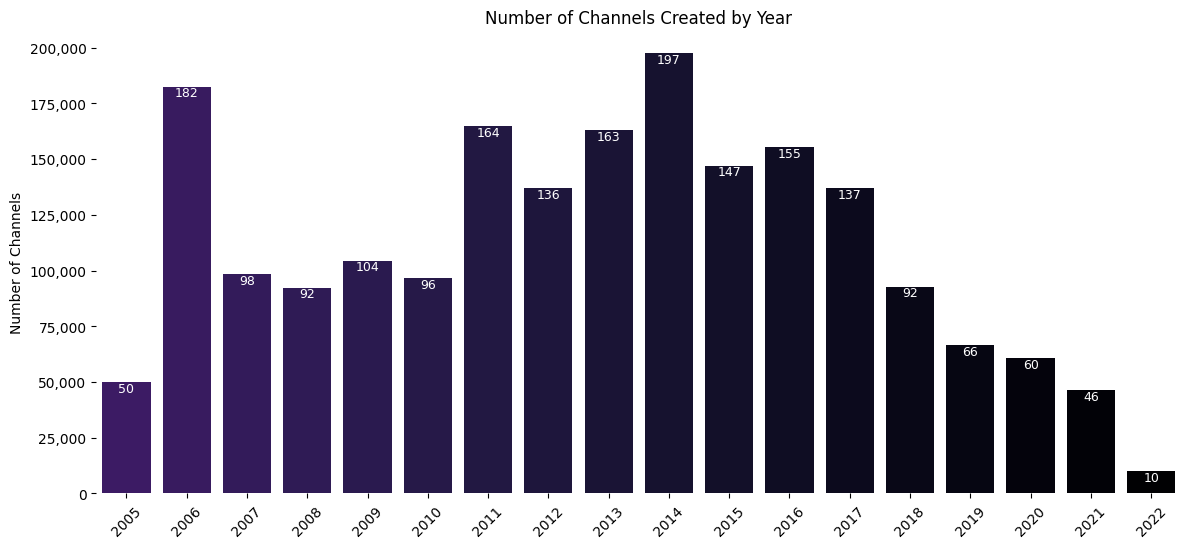

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sum_Youtubersyear
sum_Youtubersyear = df.groupby('created_year')['created_year'].sum().sort_values(ascending=False).head(18)

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 6))

# Get the color map
cmap = plt.get_cmap('magma')

# Calculate the color range based on the number of bars
colors = cmap(np.linspace(0.2, 0, len(sum_Youtubersyear)))

# Plot the bars with colors based on the color map
bars = sns.barplot(x=sum_Youtubersyear.index, y=sum_Youtubersyear, palette=colors, ax=ax)

plt.title('Number of Channels Created by Year')
plt.ylabel('Number of Channels')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis labels as integers
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])

# Add the values inside the bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2
            , bar.get_height(),
            f'{int(bar.get_height() / 1000):,}',
            ha='center', va='top', color='white', fontsize=9, rotation=0)


# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove the x-axis label as requested
ax.set_xlabel('')

plt.show()


O gráfico apresenta a quantidade de canais do YouTube criados a cada ano, do qual podemos extrair vários insights:

1. **Crescimento Inicial Rápido:** Há um aumento significativo na quantidade de canais criados entre 2005 e 2006, indicando um crescimento rápido logo após o lançamento do YouTube.

2. **Pico de Criação de Canais:** O maior número de canais foi criado em 2006, refletindo possivelmente o boom inicial de popularidade e a descoberta da plataforma por criadores de conteúdo em todo o mundo.

3. **Flutuações e Tendências:** Após o pico de 2006, há uma flutuação no número de canais criados, com aumentos e quedas que podem ser atribuídos a mudanças no mercado, na plataforma e nas tendências de consumo de vídeo online.

4. **Declínio Recente:** A partir de 2016, observa-se uma tendência de declínio na criação de novos canais, o que pode indicar uma saturação do mercado, mudanças nas políticas do YouTube ou o surgimento de novas plataformas de conteúdo.

### **Qual a maior quantidade de categorias do YouTube por inscritos no mundo?**

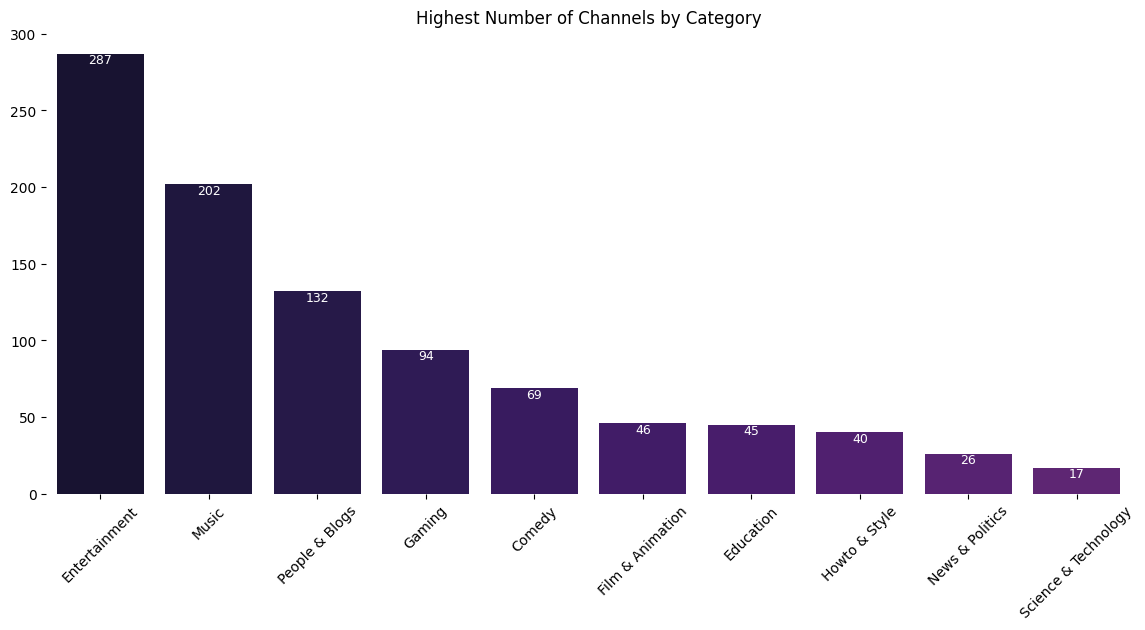

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Getting the top 10 categories
top_10_categories = df['category'].value_counts().head(10).index

# Setting up the color map
cmap = plt.get_cmap('magma')
colors = cmap(np.linspace(0.1, 0.3, len(top_10_categories)))

# Creating the plot
fig, ax = plt.subplots(figsize=(14, 6))
bars = sns.countplot(x='category', data=df, palette=colors, order=top_10_categories)

plt.title("Highest Number of Channels by Category")
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

# Adding values inside the bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{int(bar.get_height()):,}',
            ha='center', va='top', color='white', fontsize=9, rotation=0)

# Removing the spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Com base no gráfico que mostra a distribuição de canais do YouTube por categoria, podemos identificar os seguintes insights:

1. **Dominância de Categorias Específicas:** As categorias 'Entretenimento' e 'Música' são as mais populares em termos de quantidade de canais. Isso sugere que conteúdos envolvendo diversão, lazer e música têm uma demanda significativa no YouTube e podem representar uma parcela maior do engajamento dos usuários.

2. **Diversidade de Conteúdo:** Existe uma variedade de categorias que conseguiram estabelecer uma presença significativa na plataforma, indicando que o YouTube serve como um espaço diversificado para diferentes tipos de conteúdo, desde 'Pessoas & Blogs' até 'Gaming' e 'Comédia'.

3. **Oportunidades de Nicho:** Enquanto as categorias com menos canais, como 'Ciência & Tecnologia' e 'Notícias & Política', podem ter menos presença, elas representam nichos que podem oferecer oportunidades para novos criadores que procuram se destacar em áreas menos saturadas.

4. **Potencial para Educação:** A categoria 'Educação', embora não seja uma das mais altas, tem uma presença significativa, o que reflete o crescente interesse e valorização de conteúdo educacional e informativo no YouTube.

5. **Espaço para Crescimento em Novas Categorias:** Categorias emergentes, como 'Estilo de Vida' e 'Ciência & Tecnologia', podem indicar áreas de crescimento e a expansão dos interesses do público do YouTube, oferecendo novas oportunidades para criadores de conteúdo se especializarem.

6. **Engajamento vs. Saturação:** Categorias com um número extremamente alto de canais podem estar mais saturadas, o que significa que novos criadores nessas áreas podem enfrentar mais concorrência, enquanto categorias com menos canais podem oferecer mais espaço para novos criadores ganharem visibilidade.

Esses insights podem ser úteis para criadores de conteúdo ao planejar novos canais ou ao considerar estratégias de conteúdo, e para anunciantes e investidores que buscam entender melhor onde focar seus esforços no ecossistema do YouTube.

In [30]:
df.Country.value_counts()

United States           435
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
Andorra             

## **Quais são os países com maior quantidade de canais do YouTube?**

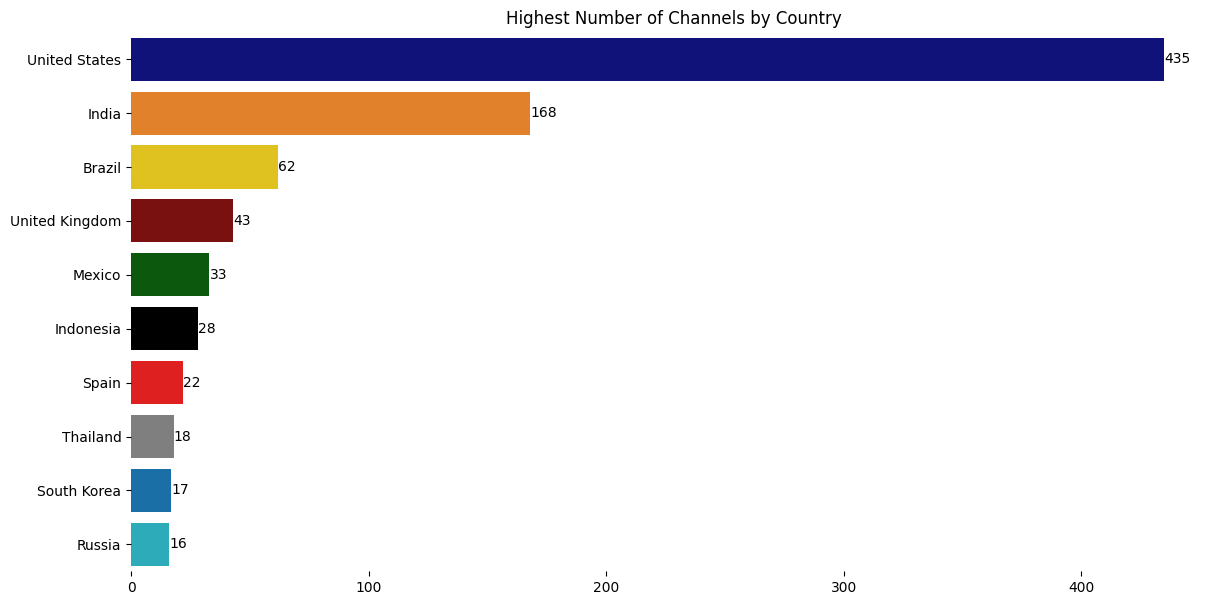

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame
top_10_categories = df['Country'].value_counts().head(10).index

# Define your custom colors here, one for each category
custom_colors = ['darkblue', '#ff7f0e', 'gold', 'darkred', 'darkgreen',
                 'black', 'red', '#7f7f7f', '#0174BE', '#17becf']

fig, ax = plt.subplots(figsize=(14,7))
bars = sns.countplot(y='Country', data=df, order=top_10_categories, palette=custom_colors)

plt.title('Highest Number of Channels by Country')
plt.xlabel('')
plt.ylabel('')

# Adding values on the bars
for bar in bars.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            f'{int(bar.get_width())}',
            va='center', ha='left', color='black', fontsize=10)


# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

O gráfico que ilustra a maior quantidade de canais do YouTube por país nos permite identificar várias tendências e padrões notáveis:

1. **Predomínio dos Estados Unidos:** A liderança dos Estados Unidos com o maior número de canais sugere que a plataforma tem uma base sólida e uma influência cultural significativa neste país. Isso pode ser reflexo tanto da língua inglesa predominante quanto do papel central que os EUA desempenham na indústria global de entretenimento e tecnologia.

2. **Forte Presença da Índia:** O número substancial de canais indianos ressalta a crescente penetração do YouTube na Índia, possivelmente impulsionada pelo aumento do acesso à internet e pela popularidade do conteúdo local.

3. **Diversificação no Brasil:** A posição proeminente do Brasil destaca a diversidade do conteúdo em língua portuguesa e o engajamento ativo do público brasileiro na plataforma.

4. **Mercados Globais:** A presença significativa de canais do Reino Unido, México, Indonésia, Espanha, Tailândia, Coreia do Sul e Rússia mostra a natureza global do YouTube, onde criadores de conteúdo de diferentes culturas e idiomas encontram uma audiência.

5. **Oportunidades de Crescimento:** Enquanto os países com menos canais podem representar mercados menos saturados, há oportunidades para o crescimento do conteúdo localizado, o que pode atrair uma audiência global que busca diversidade.

6. **Impacto do Desenvolvimento Digital:** A distribuição dos canais também reflete o desenvolvimento digital e a adoção de tecnologia nos países, indicando que mercados com maior acesso à internet de alta velocidade e dispositivos móveis tendem a ter mais canais.

### **Quais são os top 10 países com maiores inscritos do YouTube no mundo?**

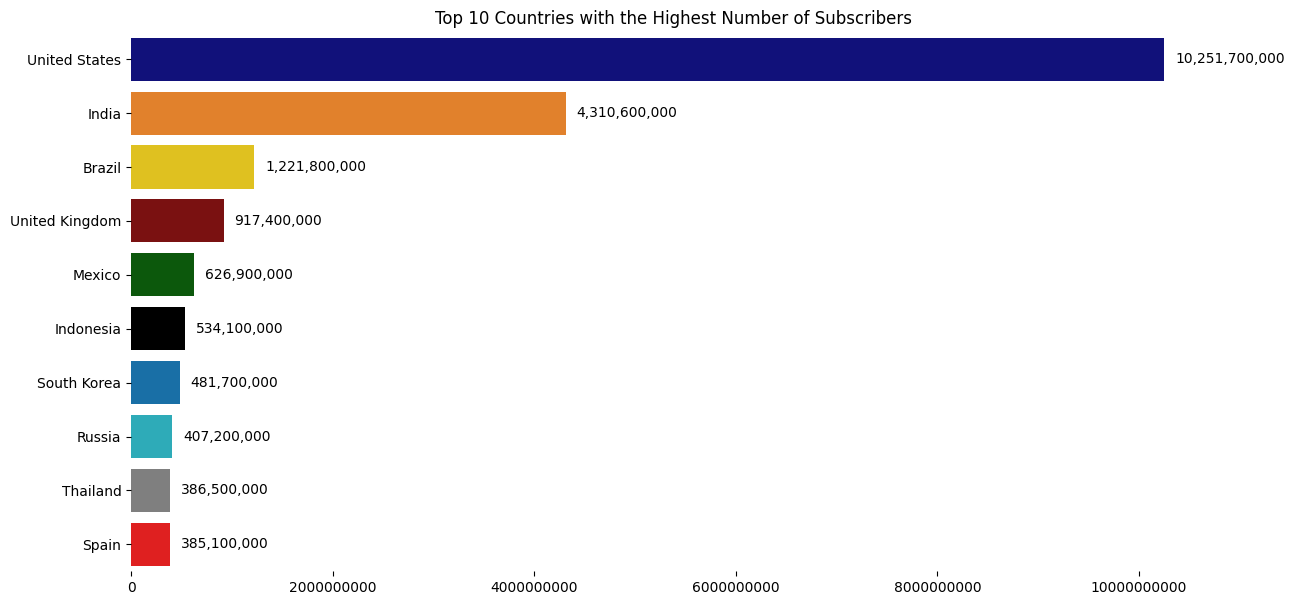

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the total number of subscribers for each country
sum_subscribers = df.groupby('Country')['subscribers'].sum().sort_values(ascending=False).head(10)

# Define your custom colors here, one for each category
custom_colors = ['darkblue', '#ff7f0e', 'gold', 'darkred', 'darkgreen',
                 'black', '#0174BE', '#17becf', '#7f7f7f', 'red']

# Plotting the results
fig, ax = plt.subplots(figsize=(14,7))
bars = sns.barplot(y=sum_subscribers.index, x=sum_subscribers.values, palette=custom_colors, ax=ax)
plt.title('Top 10 Countries with the Highest Number of Subscribers')
plt.xlabel('')
plt.ylabel('')

# Setting x-axis labels to display numbers
ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding values on the bars
for bar in bars.patches:
    ax.text(bar.get_width() + ax.get_xlim()[1] * 0.01,  # Adding a slight offset to the right
            bar.get_y() + bar.get_height() / 2,
            f'{int(bar.get_width()):,}',  # Adding comma as a thousand separator
            va='center', ha='left', color='black', fontsize=10)


plt.show()

#### Insights baseados na distribuição do número de inscritos por país:

1. **Domínio dos EUA:** Os Estados Unidos lideram em número de inscritos, o que pode ser atribuído ao seu mercado de mídia maduro e global, à ampla adoção de tecnologias digitais e à presença de grandes influenciadores e criadores de conteúdo.

2. **Fortalecimento da Índia:** A Índia se destaca como um mercado significativo para o YouTube, refletindo o rápido crescimento do país e a popularidade de conteúdo em língua hindi e regional, além do inglês ser a segunda língua do país.

3. **Presença marcante do Brasil:** O Brasil aparece em terceiro lugar, o que evidencia a popularidade do YouTube e o potencial de engajamento com o público brasileiro, além da crescente produção de conteúdo nacional.

4. **Diversidade Global:** A inclusão do Reino Unido, México, Indonésia, Coreia do Sul, Rússia, Tailândia e Espanha entre os dez primeiros mostra a diversidade e o alcance global do YouTube. Isso indica que o conteúdo localizado tem uma forte presença e ressonância com o público internacional.

5. **Oportunidades de Publicidade:** Para marcas e anunciantes, esses dados são uma mina de ouro, indicando onde focar campanhas de marketing para atingir audiências em mercados específicos com altas taxas de inscrição no YouTube.

6. **Crescimento em Mercados Emergentes:** A presença de países emergentes na lista sugere que esses mercados estão se tornando cada vez mais importantes para estratégias de crescimento no YouTube, oferecendo novas audiências para criadores de conteúdo e anunciantes.

In [33]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### **Quais são os top 10 canais do YouTube com maiores inscritos no mundo?**

In [34]:
# Calculate the sum of subscribers by Country
sum_Youtubers = df.groupby('Youtuber')['subscribers'].sum().sort_values(ascending=False).head(10)

# DataFrame
sorted_sum_Youtubers = sum_Youtubers.sort_values(ascending=True)

# Number of bars in the chart
num_bars = len(sorted_sum_Youtubers)

# Create a gradient from black to grey
gradient_colors = ['#%02x%02x%02x'  % (i, i, i) for i in range(0, 100, int(100/num_bars))]

# Ensure that the length of gradient_colors matches the number of bars
gradient_colors = gradient_colors[:num_bars]

fig_sub = px.bar(y=sorted_sum_Youtubers.index, x=sorted_sum_Youtubers.values, text_auto='.3s',
                 title="10 Channels with the Highest Number of Subscribers")

# Use update_traces to set the colors
fig_sub.update_traces(marker_color=gradient_colors)

# Customizing the axes labels
fig_sub.update_layout(xaxis_title='Top 10 channels',
                  yaxis_title='Youtuber')

# Display the figure
fig_sub.show()

Analisando o gráfico que mostra os 10 canais do YouTube com o maior número de inscritos, podemos observar as seguintes tendências e pontos de interesse:

1. **Liderança da T-Series:** T-Series se destaca significativamente dos demais, com o maior número de inscritos. Isso reflete o sucesso de sua estratégia ao oferecer uma variedade de conteúdo musical, que tem apelo massivo na Índia.

2. **Variedade de Conteúdo:** A presença de canais como YouTube Movies, MrBeast, Cocomelon - Nursery Rhymes, SET India, Music, Kids Diana Show, PewDiePie, Like Nastya, e Vlad and Niki no topo da lista destaca a diversidade do conteúdo que atrai inscritos em massa, incluindo filmes, entretenimento pessoal, conteúdo infantil e jogos.

3. **Globalização do YouTube:** Os canais listados representam criadores de várias partes do mundo, demonstrando como o YouTube é abrangente globalmente o que permite que criadores de conteúdo de diferentes culturas atinjam audiências internacionais.

4. **Sucesso do Conteúdo Infantil:** Canais como Cocomelon e Kids Diana Show enfatizam o sucesso do conteúdo direcionado ao público infantil no YouTube, sugerindo que programas educativos e de entretenimento para crianças têm um potencial significativo de inscrição.

5. **Influenciadores Individuais:** Criadores individuais como MrBeast e PewDiePie, conhecidos por suas personalidades carismáticas e conteúdo inovador, continuam a competir lado a lado com grandes estúdios de produção, demonstrando a força dos influenciadores digitais na plataforma.

6. **Dominância do Entretenimento:** A tendência geral do gráfico sugere que o entretenimento é um dos fatores mais fortes na atração e retenção de inscritos, independentemente da categoria específica do canal.

### **Quais são os top 10 canais do YouTube com mais uploads no mundo?**

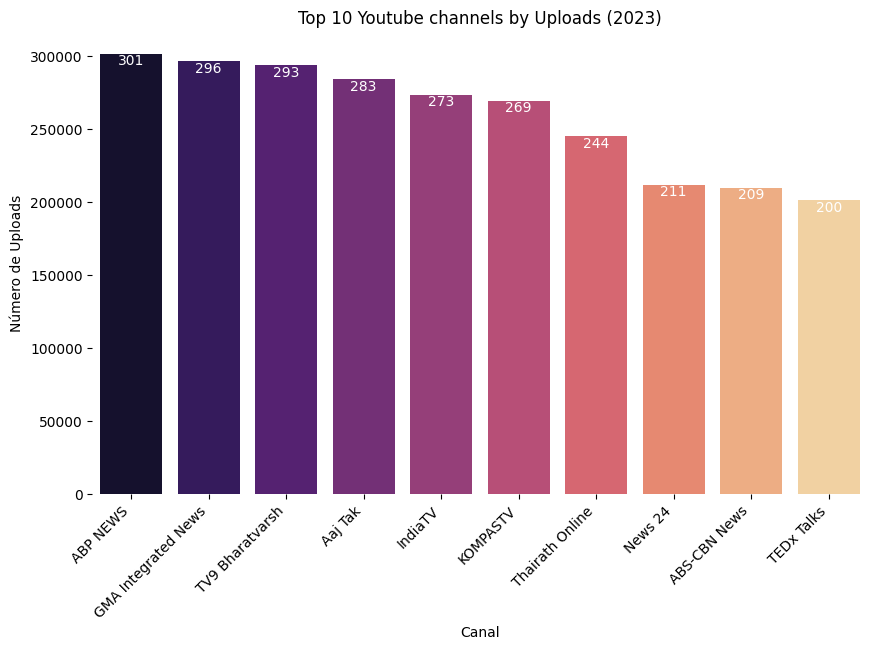

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame
top10_uploads = df.sort_values('uploads', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(data=top10_uploads, x='Youtuber', y='uploads', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Youtube channels by Uploads (2023)')
plt.xlabel('Canal')
plt.ylabel('Número de Uploads')

# Add values inside of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{int(bar.get_height()/ 1000):,}',
             ha='center', va='top', color='white', fontsize=10)

# Remove Spines
for spine in bars.spines.values():
    spine.set_visible(False)

plt.show()

#### Os 10 principais canais do YouTube por número de uploads

1. **Alto Volume de Conteúdo de Notícias:** Canais de notícias como ABP News e GMA Integrated News estão no topo da lista, sugerindo que há uma produção constante e em grande volume de conteúdo de notícias no YouTube. Isso reflete o uso da plataforma como uma fonte de atualizações contínuas e informações em tempo real.

2. **Presença de Canais de Entretenimento:** A inclusão de canais como SET India e ABS-CBN News indica uma mistura de entretenimento e informação no conjunto dos canais mais ativos, o que pode ser uma estratégia para manter a audiência engajada.

3. **Educação e Aprendizado:** A presença de TEDx Talks entre os canais com mais uploads sublinha o interesse do público por conteúdo educacional e formativo, indicando que os usuários do YouTube valorizam o aprendizado e a descoberta de novas ideias.

4. **Frequência vs. Engajamento:** Um grande número de uploads não necessariamente se traduz em mais visualizações ou engajamento, mas pode ser uma indicação da estratégia do canal para manter a relevância e a visibilidade na plataforma.

#### Relacionamentos e Correlações:

Um gráfico de dispersão explora a relação entre o número de visualizações e o número de inscritos, indicando uma correlação positiva.
Outra análise calcula as médias de ganhos mensais dos canais e as compara com o número de inscritos, mostrando variações significativas nos ganhos.

## Correlação entre o número de visualizações e o número de Inscritos

In [36]:
df_earnings = df[['Youtuber']].copy()
df_earnings['mean_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean(axis=1) / 10**6
df_earnings

,Youtuber,mean_monthly_earnings
0,T-Series,4.78
1,YouTube Movies,0.00
2,MrBeast,2.87
3,Cocomelon - Nursery Rhymes,4.20
4,SET India,3.88
...,...,...
990,Natan por Aï¿,1.17
991,Free Fire India Official,0.14
992,Panda,0.00
993,RobTopGames,0.01


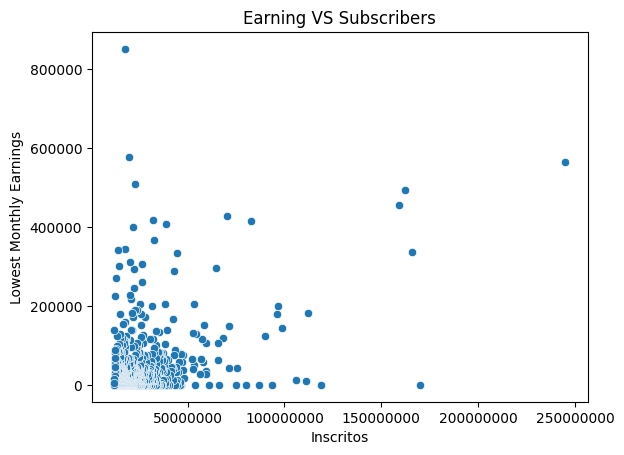

In [37]:
# Analyze earnings and their relationship with subscribers
Ganhos_vs_Inscritos = sns.scatterplot(x='subscribers', y='lowest_monthly_earnings', data=df, palette='viridis')
plt.title('Earning VS Subscribers')
plt.xlabel('Inscritos')
plt.ylabel('Lowest Monthly Earnings')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Ao analisar a relação entre Ganhos e Inscritos(Earnings vs. Subscribers), observamos uma correlação positiva entre essas variáveis. Com o aumento no número de inscritos, os ganhos tendem a subir. Contudo, existem exceções nos dados. Por exemplo, há canais com muitos inscritos e ganhos reduzidos. Isso pode ocorrer porque o canal é recente e ainda não começou a gerar receita significativa. Há também casos de canais com poucos inscritos e ganhos elevados, o que pode ser explicado pelo fato de o canal ser mais antigo e já ter acumulado uma quantia considerável de dinheiro. De modo geral, a tendência é que a maioria dos inscritos fique abaixo de 40 milhões e os ganhos abaixo de 100.000.

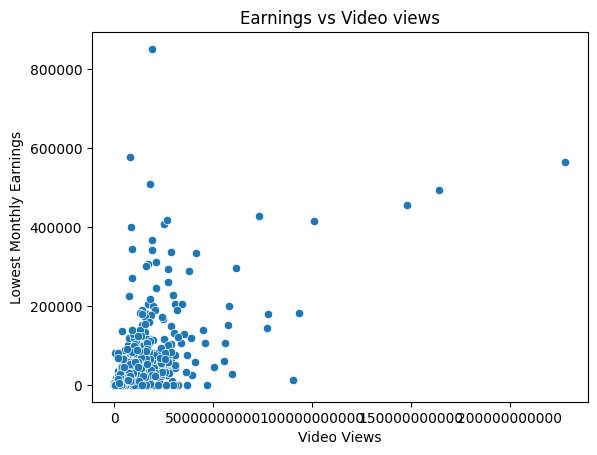

In [38]:
# Analyze earnings and their relationship with video views
earnings_vs_video_views = sns.scatterplot(x='video views', y='lowest_monthly_earnings', data=df, palette='viridis')
plt.title('Earnings vs Video views')
plt.xlabel('Video Views')
plt.ylabel('Lowest Monthly Earnings')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Ao examinarmos a relação entre os Ganhos e as Visualizações de Vídeo (Earnings and Video Views) dos principais criadores de conteúdo, percebemos uma correlação positiva entre esses indicadores. À medida que as visualizações dos vídeos crescem, os ganhos também aumentam. Isso é compreensível, já que quanto maior o número de visualizações, maior é a quantidade de anúncios exibidos e, consequentemente, maior é a receita gerada pelo criador do conteúdo.

In [39]:
# Correlation between the Subscribers and video views
df['video views'].corr(df['subscribers'])

0.7509576173780216

Há uma alta correlação entre Inscritos e Visualização de vídeos

In [40]:
# Correlation between the highest monthly earnings and video views
df['highest_monthly_earnings'].corr(df['video views'])

0.5514551018128524

Há uma correlação modeiradamente forte entre os mais altos ganhos mensais e Visualização de vídeos

In [41]:
# Correlation between the highest monthly earnings and Subscribers
df['highest_monthly_earnings'].corr(df['subscribers'])

0.3885788005911724

### **Quais são as categorias de canais do YouTube com maiores ganhos mensais no mundo?**


In [42]:
highest_earning_category = df.groupby(['category'])['highest_monthly_earnings'].sum().sort_values(ascending=False)
highest_earning_category

category
Entertainment           195341735.20
Music                   111564523.95
People & Blogs           72183154.16
Comedy                   46113543.00
Film & Animation         33704283.22
Education                31283000.10
Shows                    26489600.00
Gaming                   25559111.38
News & Politics          16708431.00
Sports                    8876300.00
Howto & Style             7711962.34
Science & Technology      3434735.00
Pets & Animals            3177729.00
Autos & Vehicles          2172700.00
Movies                     909400.00
Nonprofits & Activism      780800.00
Trailers                   723800.00
Travel & Events            124000.00
Name: highest_monthly_earnings, dtype: float64

In [43]:
# Sort the data in ascending order for better visual representation
sorted_highest_earning_category = highest_earning_category.sort_values(ascending=True)

# Number of bars in the chart
num_bars = len(sorted_highest_earning_category)

# Create the bar chart with Plotly Express
fig = px.bar(y=sorted_highest_earning_category.index, x=sorted_highest_earning_category.values, text_auto='.3s',
             title='Highest Monthly Earnings by Category')

fig.update_traces(textfont_size=50)
fig.update_traces(textposition='outside')


# Create a gradient from black to grey
gradient_colors = ['#%02x%02x%02x' % (i, i, i) for i in range(0, 100, int(100/num_bars))]

# Ensure that the length of gradient_colors matches the number of bars
gradient_colors = gradient_colors[:num_bars]

# Use update_traces to set the colors
fig.update_traces(marker_color=gradient_colors)

# Customizing the axes labels
fig.update_layout(xaxis_title='Highest Monthly Earnings',
                  yaxis_title='Category')

# Display the figure
fig.show()

O gráfico exibe os ganhos mensais mais altos no YouTube por categoria

1. **Entretenimento no Topo:** A categoria 'Entretenimento' lidera com os maiores ganhos mensais. Isso sugere que o conteúdo de entretenimento possui o maior potencial de monetização no YouTube, provavelmente devido a altas taxas de visualização e engajamento do público.

2. **Popularidade da Música:** A música também mostra ganhos significativos, o que é esperado, dada a natureza universal da música e como ela cruza fronteiras culturais e linguísticas, alcançando vastas audiências globais.

3. **Influência dos Blogs:** 'Pessoas & Blogs' vem logo após, indicando que vlogs pessoais e conteúdo de estilo de vida têm um apelo substancial, permitindo que criadores individuais construam comunidades fortes e monetizem efetivamente seu conteúdo.

4. **Educação e Animação:** A categoria 'Educação' e 'Filme & Animação' mostrando ganhos notáveis reflete o interesse do público por conteúdo informativo e criativo, e a disposição de investir tempo em vídeos educacionais e de entretenimento animado.

5. **Diversificação de Receita:** As categorias subsequentes, incluindo 'Gaming', 'Notícias & Política', e 'How To & Style' demonstram a diversificação de conteúdo que pode gerar receita no YouTube. Cada uma dessas categorias tem seu nicho de público que pode ser altamente engajado e lucrativo.

### **Quais são os países com maiores ganhos mensais do YouTube no mundo?**

In [44]:
# Group by of columns (['Country'])['highest_monthly_earnings']
Subscribers_by_country = df.groupby(['Country'])['highest_monthly_earnings'].sum().sort_values(ascending=False)
Subscribers_by_country

Country
United States          221362534.32
India                  149186204.08
Brazil                  28849091.00
South Korea             26623100.00
United Kingdom          14644075.00
Pakistan                13000237.00
Argentina               12467900.06
Russia                  11572531.00
United Arab Emirates    10099500.00
Indonesia                9857800.34
Colombia                 9607900.00
Turkey                   8060900.00
Mexico                   7218781.00
Japan                    6956710.00
Philippines              6808800.00
Thailand                 6602600.09
Canada                   6148700.00
Germany                  5639852.00
Italy                    5019500.00
Latvia                   5000000.00
Spain                    4040768.43
Ukraine                  2661600.42
Australia                2453600.69
Sweden                   2295200.00
Saudi Arabia             1689800.00
Jordan                   1492500.00
Vietnam                  1478400.00
Netherlands         

In [45]:
import plotly.express as px



# Sort the data in ascending order for better visual representation
sorted_Subscribers_by_country = Subscribers_by_country.sort_values(ascending=False).head(10)

sorted_Subscribers_by_country = sorted_Subscribers_by_country.sort_values(ascending=True)

# Your custom colors
custom_colors = ['gray', 'black', '#7adbf0', '#17becf', 'red',
                 'darkred', '#005b96', 'gold', 'orange','darkblue']

# Repeat the color list to cover all bars if there are more bars than colors
num_bars = len(sorted_Subscribers_by_country)
repeated_colors = (custom_colors * (num_bars // len(custom_colors) + 1))[:num_bars]

# Create the bar chart with Plotly Express
fig = px.bar(y=sorted_Subscribers_by_country.index, x=sorted_Subscribers_by_country.values, text_auto='.3s',
             title='Top 10 Monthly Earnings by Country')

# Use update_traces to set the custom colors
fig.update_traces(marker_color=repeated_colors)

# Customizing the axes labels
fig.update_layout(xaxis_title='Top 10 Monthly Earnings',
                  yaxis_title='Country')

# Customize the size of the figure
fig.update_layout(autosize=True, width=1000, height=600)

# Display the figure
fig.show()

Ao observar o gráfico fornecido, que ilustra os ganhos mensais no YouTube por país, podemos extrair os seguintes insights:

1. **Supremacia dos EUA:** Os Estados Unidos lideram com uma margem significativa em termos de ganhos mensais no YouTube. Isso pode refletir a combinação da presença de grandes influenciadores, o poder de compra do público americano e a forte infraestrutura publicitária do país.

2. **Fortes Mercados Regionais:** Países como Índia e Brasil seguem os EUA em ganhos mensais, o que indica um mercado de conteúdo digital robusto e crescente nessas regiões.

## Outliers

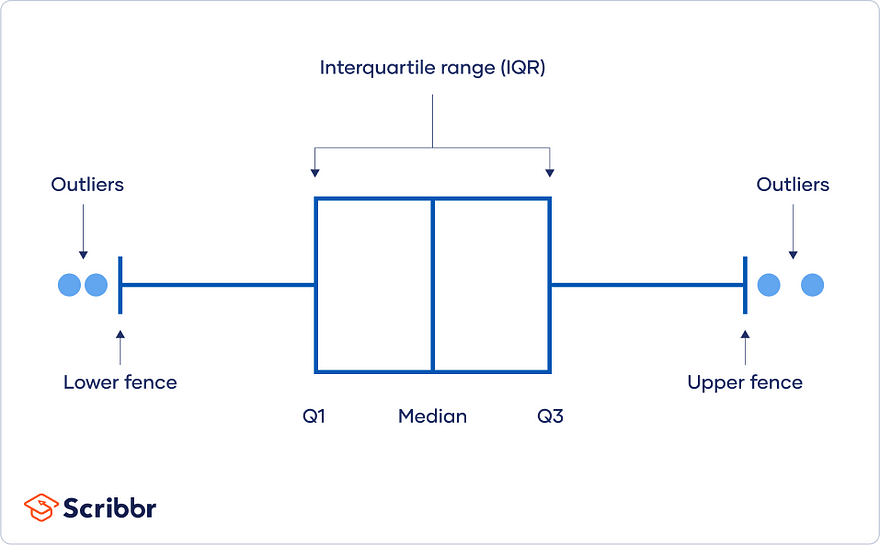

In [46]:


def count_outliers(column):
    """Count the number of outliers in a column using the IQR method."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Select numeric columns excluding 'Longitude' and 'Latitude'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Longitude', 'Latitude'])

# Count outliers for each numeric column
outliers_count = numeric_cols.apply(count_outliers)

# Convert to DataFrame for display
outliers_count_df = outliers_count.reset_index()
outliers_count_df.columns = ['Variavel', 'Quantidade de Outliers']
outliers_count_df


,Variavel,Quantidade de Outliers
0,rank,0
1,subscribers,76
2,video views,52
3,uploads,132
4,video_views_rank,178
5,country_rank,74
6,channel_type_rank,119
7,video_views_for_the_last_30_days,106
8,lowest_monthly_earnings,99
9,highest_monthly_earnings,99


In [47]:
import plotly.express as px

# Sort the DataFrame based on 'Quantidade de Outliers'
sorted_df = outliers_count_df.sort_values(by='Quantidade de Outliers', ascending=True)

# Create the bar chart
fig = px.bar(sorted_df, y='Variavel', x='Quantidade de Outliers',
             text='Quantidade de Outliers',
             title='Distribuição dos Outliers nas Colunas do DataFrame',
             height=600)

# Update the trace for displaying text above bars
fig.update_traces(textposition='outside')
fig.update_traces(textfont_size=15)
fig.update_traces(textfont_color='black')


# Create a gradient from black to grey
gradient_colors = ['#%02x%02x%02x' % (i, i, i) for i in range(0, 100, int(100/num_bars))]

# Ensure that the length of gradient_colors matches the number of bars
gradient_colors = gradient_colors[:num_bars]

# Use update_traces to set the colors
fig.update_traces(marker_color=gradient_colors)

# Show the figure
fig.show()

1. **Outliers em Uploads e Inscrições Recentes:** Há um número relativamente alto de outliers nas variáveis 'uploads' e 'subscribers_for_last_30_days'. Isso pode indicar que alguns canais têm um volume de atividade muito mais alto do que a média, seja em termos de conteúdo postado ou no crescimento de inscritos em um curto período.

2. **Visualizações de Vídeo Variadas:** Um número significativo de outliers em 'video_views' e 'video_views_for_the_last_30_days' sugere que existem canais com desempenho excepcional em termos de visualizações, o que pode ser um indicativo de conteúdo viral ou eventos que impulsionam o tráfego para esses canais de forma atípica.

3. **Diversidade de Rendimento:** As variáveis 'highest_monthly_earnings', 'lowest_monthly_earnings', 'highest_yearly_earnings' e 'lowest_yearly_earnings' também têm muitos outliers, refletindo uma grande disparidade nos ganhos entre os canais. Alguns canais podem estar gerando receitas substancialmente mais altas do que outros, o que poderia ser explorado para entender melhor o que contribui para a alta monetização no YouTube.

4. **Concorrência Internacional:** A presença de outliers em 'country_rank' e 'channel_type_rank' indica que alguns países e tipos de canal estão muito à frente dos outros em termos de classificação, talvez devido a mercados de mídia bem desenvolvidos ou categorias de conteúdo com demanda particularmente alta.

5. **Ganhos Atípicos de Inscritos:** 'subscribers_for_last_30_days' possui muitos outliers, o que pode sugerir que eventos específicos, como lançamentos de produtos, colaborações ou campanhas promocionais, podem afetar drasticamente o crescimento de inscritos em um curto período.

6. **População e Educação Não são Fatores de Outliers:** As variáveis 'Gross tertiary education enrollment (%)' e 'Population' não apresentam outliers, o que pode indicar que esses fatores não variam tanto entre os canais ou não estão diretamente relacionados com as métricas de desempenho do canal que foram analisadas.



# **Conclusão**

Nossa análise detalhada dos canais do YouTube oferece uma visão rica e quantitativa do ecossistema do YouTube. Revela-se que categorias específicas, como 'Entretenimento' e 'Música', dominam em termos de popularidade e potencial de ganhos. Além disso, a presença de canais de países como EUA, Índia e Brasil, destaca a diversidade e o alcance global da plataforma.

A compreensão dessas dinâmicas é crucial para criadores de conteúdo e anunciantes que buscam maximizar sua presença e rentabilidade no YouTube. Com estratégias baseadas em dados, é possível aproveitar as tendências de crescimento e engajamento, alavancando o potencial de canais de alta performance em categorias e países estratégicos.

## Estratégias de Engajamento e Monetização no YouTube

## Categorias de Alto Engajamento
Concentrar-se em categorias como 'Entretenimento', 'Música', e 'Educação' é fundamental, pois elas não apenas possuem um alto número de inscritos e visualizações, mas também apresentam um potencial significativo de monetização.

### Top 10 Categorias com Maiores Ganhos
1. Entretenimento
2. Música
3. People & Blogs
4. Comédia
5. Filme e Animação
6. Educação
7. Shows
8. Jogos
9. News & Politics
10. Esportes

## Conteúdo Infantil e Familiar
Investir em conteúdo infantil, como demonstrado pelo sucesso de canais como **Cocomelon** e **Kids Diana Show**, pode ser muito lucrativo, atendendo à demanda por conteúdo educativo e de entretenimento para crianças.

## Influenciadores Individuais
Criadores individuais como **MrBeast** e **PewDiePie** competem com grandes estúdios de produção, destacando a força dos influenciadores digitais na plataforma.

## Oportunidades de Nicho
Categorias com menos canais, como 'Ciência & Tecnologia' e 'Notícias & Política', representam nichos com oportunidades para novos criadores.

## Fortes Mercados no YouTube
- **Estados Unidos**: Maior potência em quantidade de inscritos por país.
- **Índia**: Dois canais no top 10, incluindo o T-Series, líder em inscritos.
- **Brasil**: Entre os três primeiros em número de inscritos por país, com o KondZilla sendo o maior canal brasileiro.

## Correlações Importantes
Mais inscritos e visualizações geralmente levam a maiores ganhos, mas fatores como a antiguidade do canal e estratégias de monetização específicas também são cruciais.

## Dicas para Criadores

#### Publique Conteúdo Regularmente
São carregadas 500 horas de vídeo a cada minuto, evidenciando a importância da consistência.

### Estratégias de Monetização Diversificadas
Explorar várias fontes de receita, como anúncios, patrocínios, merchandising e conteúdo exclusivo, pode maximizar os ganhos.

### Aproveite o Alcance Potencial de Anúncios
Em julho de 2023, o YouTube teve um alcance potencial de anúncios de 2,53 bilhões de pessoas.

### Uso de Dados e Analytics
Utilize análises de dados para entender tendências de mercado, preferências de público e padrões de engajamento para otimizar o conteúdo e as estratégias de marketing.


### Conclusão:
O sucesso no YouTube depende de uma compreensão profunda das tendências atuais, do mercado e do comportamento da audiência. Investir nas categorias certas, mercados emergentes e estratégias de monetização diversificadas, juntamente com o uso eficiente de dados e análises, pode maximizar as chances de sucesso na plataforma. A chave é manter o conteúdo relevante, culturalmente adaptado e de alta qualidade, garantindo assim um engajamento significativo e sustentável com o público global.